# Week 7 Module 3 Assignment 2
## Francis Yang - 11/14/2022
### Exercise 1
1.	Load the dataset bike_day_raw.csv, which has the regression target cnt. This dataset is hourly bike rentals in the citybike platform. The cnt column is the number of rentals, which we want to predict from date and weather data.
    *	Split the data into a training and a test set using `train_test_split`
    *	Use the LinearRegression class to learn a regression model on this data
    *	You can evaluate with the score method, which provides the R^2or using the `mean_squared_error `function from sklearn.metrics (Challenge: You can also write it yourself in numpy)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = pd.read_csv('datasets/bike_day_raw.csv')
data.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [2]:
y = data['cnt']
X = data.drop('cnt', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression()
reg.fit(X_train,y_train)
reg.score(X_test,y_test)

0.4379583729229225

### Exercise 2
2.	Load the diabetes dataset using sklearn.datasets.load_diabetes.
    *	Scale the dataset (you can be creative and make pipelines)
    *	Apply LinearRegression,
    *	Apply Ridge and do grid search
    *	Apply Lasso and do grid search
    *	Visualize the coefficients.


In [4]:
from sklearn.datasets import load_diabetes

data = load_diabetes()
data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [5]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

#### Prompt says to scale data, but note above says features have been scaled already

In [6]:
X = data.data
y = data.target

In [7]:
pdata = pd.DataFrame(X, columns = data['feature_names'])
pdata.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [8]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

Text(0.5, 1.0, 'Linear Best Coeff')

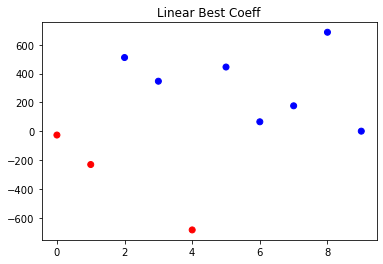

In [9]:
lr = LinearRegression().fit(X_train, y_train)
plt.scatter(range(X.shape[1]),lr.coef_, c=np.sign(lr.coef_), cmap="bwr_r")
plt.title("Linear Best Coeff")

Text(0.5, 1.0, 'Ridge Best Coeff')

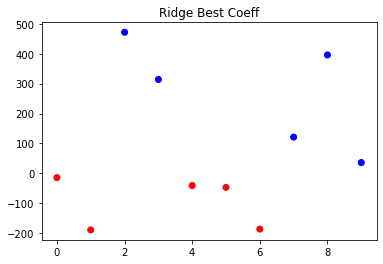

In [10]:
rreg = Ridge()
param_grid = {'alpha': np.logspace(-3, 3, 13)}
grid = GridSearchCV(rreg, param_grid, cv=10, return_train_score=True)
grid_nopoly = grid.fit(X_train, y_train)
ridge_result = grid.best_estimator_
plt.scatter(range(X.shape[1]), ridge_result.coef_, c=np.sign(ridge_result.coef_), cmap="bwr_r")
plt.title("Ridge Best Coeff")

Text(0.5, 1.0, 'Lasso Best Coeff')

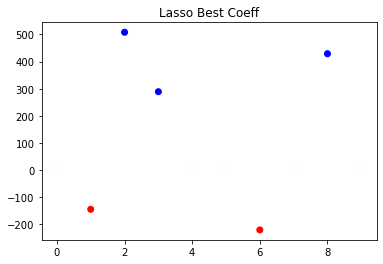

In [11]:
lreg = Lasso()
param_grid = {'alpha': np.logspace(-3, 0, 13)}
grid = GridSearchCV(lreg, param_grid, cv=10, return_train_score=True)
grid.fit(X_train, y_train)
lasso_result = grid.best_estimator_
plt.scatter(range(X.shape[1]), lasso_result.coef_, c=np.sign(lasso_result.coef_), cmap="bwr_r")
plt.title("Lasso Best Coeff")

Most of the coefficients are zero and therefore removed